In [12]:
import pandas as pd
import io

In [13]:
s = """A,B,C,D
1,2,3,4
5,6,,8
9,10,11,
"""

In [15]:
df = pd.read_csv(io.StringIO(s))

In [20]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [21]:
df.dropna(axis=0)

,A,B,C,D
0,1,2,3.0,4.0


In [22]:
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,9,10


In [25]:
s = """A,B,C,D
1,2,
,,,
4,5,6
"""

In [35]:
df = pd.read_csv(io.StringIO(s))

In [36]:
df

,A,B,C,D
0,1.0,2.0,NaN,NaN
1,NaN,NaN,NaN,NaN
2,4.0,5.0,6.0,NaN


In [30]:
# 全为空才会删除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,NaN,NaN
2,4.0,5.0,6.0,NaN


In [31]:
df.dropna(thresh=3)

,A,B,C,D
2,4.0,5.0,6.0,NaN


In [34]:
df.dropna(subset=['C'])

,A,B,C,D
2,4.0,5.0,6.0,NaN


In [37]:
import sklearn
sklearn.__version__

'0.19.1'

In [41]:
from sklearn.preprocessing import Imputer

In [44]:
print(df.values)
im = Imputer()
im.fit(df.values)

[[ 1.  2. nan nan]
 [nan nan nan nan]
 [ 4.  5.  6. nan]]


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [45]:
im.transform(df.values)

array([[1. , 2. , 6. ],
       [2.5, 3.5, 6. ],
       [4. , 5. , 6. ]])

In [46]:
s = """color,size,price,classlabel
green,M,10.1,class1
red,L,13.5,class2
blue,XL,15.3,class1
"""

In [48]:
df = pd.read_csv(io.StringIO(s))

In [51]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [55]:
df['size'] = df['size'].map({'M':1,'L':2,'XL':3})

In [56]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [57]:
df['classlabel'] = df['classlabel'].map({'class1':0,'class2':1})

In [58]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [60]:
X = df.values[:,:3]

In [61]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X[:,0])
X[:,0] = le.transform(X[:,0])

In [63]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit(X)
xx = ohe.transform(X)

In [68]:
print(xx.toarray())

[[ 0.   1.   0.   1.  10.1]
 [ 0.   0.   1.   2.  13.5]
 [ 1.   0.   0.   3.  15.3]]


wine数据处理

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('./wine.data', header=None)

In [12]:
df.columns = ['Class label' ,'Alcohol' ,'Malic acid' ,'Ash' ,
              'Alcalinity of ash  ' ,'Magnesium' ,
              'Total phenols' ,'Flavanoids' ,'Nonflavanoid phenols' ,
              'Proanthocyanins' ,'Color intensity' ,'Hue' ,'OD280/OD315 of diluted wines' ,
              'Proline']

In [13]:
import numpy as np

In [14]:
np.unique(df['Class label'].values)

array([1, 2, 3])

In [15]:
X, y =  df.iloc[:, 1:14].values, df.iloc[:, 0].values

In [16]:
print(X.shape, y.shape)

(178, 13) (178,)


In [18]:
# 1. 数据是否有缺失,如果有缺少,则需要进行处理
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [19]:
# 2. 数据是否都为数值类型,如果不是则需要转化
df.tail()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [20]:
# 对数据进行标准化,是否每个数据在训练前都可以标准化

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(133, 13) (133,) (45, 13) (45,)


In [28]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train_normal = mms.transform(X_train)
X_test_normal = mms.transform(X_test)
print(X_train_normal[1, :])
print(X_test_normal[1, :])

[0.71637427 0.12055336 0.48663102 0.27835052 0.30434783 0.68965517
 0.592827   0.15384615 0.5        0.50682594 0.56382979 0.86037736
 0.53581871]
[0.34795322 0.11857708 0.28877005 0.40721649 0.19565217 0.16206897
 0.21518987 0.28846154 0.32517483 0.09982935 0.59574468 0.56603774
 0.18274854]


In [29]:
# 标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)
print(X_train_std[1, :])
print(X_test_std[1, :])

[ 1.04831907 -0.89540486 -0.33477835 -1.01434837 -0.07977598  1.06486278
  1.0729103  -1.15605396  0.4791943   0.90437111  0.29906659  1.30687984
  0.97008996]
[-0.49298037 -0.90416461 -1.67416395 -0.30115143 -0.75991732 -1.34118793
 -0.68405596 -0.57047929 -0.41895737 -1.13357182  0.43482036  0.19642268
 -0.56846448]


In [30]:
# 使用knn算法
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_std, y_train)
s = knc.score(X_test_std, y_test)
print(s)

0.9555555555555556


In [32]:
# 使用decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_std, y_train)
s= dtc.score(X_test_std, y_test)
print(s)

0.8222222222222222


In [34]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
s = lr.score(X_test_std, y_test)
print(s)

0.9555555555555556


机器学习流程

1. 读取数据,观察数据
2. 处理数据,处理数据空缺和数值化
3. 分割数据集,训练集/测试集
3. 标准化
4. 选择模型,训练
5. 模型评估
6. 预测

特征选择: 主要目的就是从已经有的数据中选择部分特征,防止过拟合

train score:  0.9919354838709677
test score:  0.9814814814814815


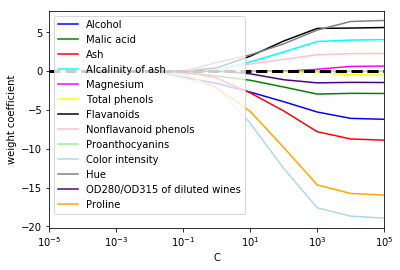

In [26]:
import pandas as pd
df = pd.read_csv('./wine.data', header=None)
df.columns = ['Class label' ,'Alcohol' ,'Malic acid' ,'Ash' ,
              'Alcalinity of ash  ' ,'Magnesium' ,
              'Total phenols' ,'Flavanoids' ,'Nonflavanoid phenols' ,
              'Proanthocyanins' ,'Color intensity' ,'Hue' ,'OD280/OD315 of diluted wines' ,
              'Proline']
X, y = df.iloc[:, 1:14].values, df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1)
lr.fit(X_train_std, y_train)
print('train score: ', lr.score(X_train_std, y_train))
print('test score: ', lr.score(X_test_std, y_test))

import numpy as np
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params,
             weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
plt.show()

特征排序